In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import tensorflow as tf
import tensorflow.keras as keras

In [2]:
df_in = pd.read_csv('In.txt')
df_in.columns = ['Index','Q_init','rms_time','rms_laser','Phase_gun','Amplitude_gun','Solenoid_T','Phase_b1','Amplitude_b1','Phase_b2','Amplitude_b2','Phase_b3','Amplitude_b3']
df_in = df_in.drop(['Index'], axis=1)

df_in.tail(5)

,Q_init,rms_time,rms_laser,Phase_gun,Amplitude_gun,Solenoid_T,Phase_b1,Amplitude_b1,Phase_b2,Amplitude_b2,Phase_b3,Amplitude_b3
57128,0.002584,0.005508,0.5,-6.665740,20.0,0.060107,134.803873,6.489994,106.685299,3.377732,12.996731,9.455422
57129,0.004583,0.008716,0.5,3.527180,20.0,0.050244,-11.666945,2.509892,122.450896,1.891439,3.681108,9.356122
57130,0.003256,0.005224,0.5,-7.856527,20.0,0.055520,71.789618,8.347391,170.906348,1.718570,63.230048,5.332509
57131,0.001451,0.009593,0.5,5.975348,20.0,0.064859,-141.744315,8.225324,16.398368,2.145144,150.528370,0.012594
57132,0.000928,0.005313,0.5,-5.675682,20.0,0.067222,-67.815905,3.970272,26.915734,3.585911,162.004878,0.515728


In [3]:
df_out = pd.read_csv('Out.txt')
df_out.columns = ['Index','Emittance_z','Bunch_length', 'Kinetic_energy', 'Energy_deviation','TOF','Trans_size','Trans_emittance','Q','Bunch_duration','ToF_Jitter','E_Jitter','Time_Resolution']
df_out = df_out.drop(['Index'], axis=1)

df_out.tail(5)

,Emittance_z,Bunch_length,Kinetic_energy,Energy_deviation,TOF,Trans_size,Trans_emittance,Q,Bunch_duration,ToF_Jitter,E_Jitter,Time_Resolution
57128,8.7844,4.9873,2.0011,43.5470,26.434,0.24771,0.035224,-0.000032,1.697933e-11,2.033862e-12,0.203811,1.710071e-11
57129,24.1500,3.4762,2.8268,27.6220,26.154,0.25496,0.047749,-0.000021,1.172556e-11,1.101503e-13,0.011586,1.172608e-11
57130,1.9705,3.1009,1.9790,36.3620,26.253,0.14772,0.035960,-0.000021,1.056112e-11,1.223469e-12,0.178165,1.063175e-11
57131,58.9370,11.3300,1.1786,53.9090,26.688,1.69290,0.135120,-0.000095,3.962222e-11,8.037329e-13,0.042704,3.963037e-11
57132,1.8781,0.2080,2.0880,9.1868,26.222,1.47050,0.113140,-0.000111,7.071360e-13,1.763521e-13,0.018504,7.287944e-13


In [4]:
#print(df_in.loc[53585])
#print(df_out.loc[53585])

In [5]:
###Minimum locations: 18835[125fs], 21944[119fs], 37676[100fs]

df_out.sort_values(by=['Time_Resolution'])
#df_out.sort_values(by=['ToF_Jitter'])
#df_out.sort_values(by=['Bunch_duration'])


#df_out['Time_Resolution'].argmin()

,Emittance_z,Bunch_length,Kinetic_energy,Energy_deviation,TOF,Trans_size,Trans_emittance,Q,Bunch_duration,ToF_Jitter,E_Jitter,Time_Resolution
40656,0.59455,0.029703,2.7769,21.3530,26.141,0.33014,0.033492,-0.000029,1.002279e-13,7.474140e-14,0.084156,1.250276e-13
5196,0.36601,0.029851,2.8025,12.7720,26.096,0.82610,0.097915,-0.000080,1.007081e-13,7.667967e-14,0.085526,1.265776e-13
41966,0.25967,0.030751,2.5373,8.5456,26.198,0.64859,0.056850,-0.000031,1.039747e-13,7.912727e-14,0.061765,1.306593e-13
13720,0.64627,0.031595,2.7950,21.6950,26.143,0.45099,0.038993,-0.000024,1.065977e-13,7.831549e-14,0.050275,1.322739e-13
11789,0.31436,0.032669,2.7622,10.3110,26.155,0.70698,0.063986,-0.000037,1.102485e-13,8.407305e-14,0.038597,1.386470e-13
...,...,...,...,...,...,...,...,...,...,...,...,...
46330,876.30000,18.573000,1.0276,76.8400,27.368,7.63090,4.057900,-0.000036,6.563567e-11,NaN,NaN,NaN
47684,2.34820,4.523100,1.0363,12.5910,27.335,2.89370,1.362400,-0.000022,1.597322e-11,NaN,NaN,NaN
48273,58.58700,4.305700,1.0276,28.6720,27.810,31.51200,12.853000,-0.000034,1.521604e-11,NaN,NaN,NaN
48460,241.89000,10.246000,1.0350,29.0140,27.998,119.08000,208.210000,-0.000170,3.618722e-11,NaN,NaN,NaN


In [14]:
hbar=6.62e-34/(2*np.pi)
m=9.1e-31
c=3e8
coeff = hbar/m/c
df_out['Lateral_coherence'] = coeff*df_out['Trans_size']*1e-3/(df_out['Trans_emittance']*1e-6)



#df_out.iloc[np.arange(df_out['Bunch_length'].argmax()-5,df_out['Bunch_length'].argmax()+5)]

In [84]:
df_in = df_in[df_out['Time_Resolution'].notna()]
df_out = df_out[df_out['Time_Resolution'].notna()]

df_out['Log_TR'] = -np.log10(df_out['Time_Resolution'])
df_out['Log_Q'] = -np.log10(-df_out['Q'])


df_in_short = df_in[['Q_init','rms_time','Phase_gun','Phase_b1','Amplitude_b1','Phase_b2','Amplitude_b2','Phase_b3','Amplitude_b3']]
#df_out_short = df_out[['Log_TR']]#,'Q','Trans_emittance','Trans_size','Kinetic_energy']]
df_out_short = df_out[['Log_TR','Lateral_coherence','Kinetic_energy']]#,'Log_Q']]#,'Q','Trans_emittance','Trans_size','Kinetic_energy']]


#df_out_short = df_out[['Log_bunch_length','Log_deviation']]
#df_out_short = df_out[['Log_bunch_length']]
#df_out_short = df_out[['Log_emittance', 'Log_bunch_length','Log_deviation']]




x_train, x_validate, x_test = np.split(df_in_short.sample(frac=1, random_state=42), [int(.7*len(df_in)), int(.9*len(df_in))])
#y_train, y_validate, y_test = np.split(df_out['Log_bunch_length'].sample(frac=1, random_state=42), [int(.7*len(df_out)), int(.9*len(df_out))])
y_train, y_validate, y_test = np.split(df_out_short.sample(frac=1, random_state=42), [int(.7*len(df_out)), int(.9*len(df_out))])




df_out_short.head(5)

,Log_TR,Lateral_coherence,Kinetic_energy
0,11.304445,1.062025e-09,1.7218
1,11.088427,2.358883e-09,2.2708
2,10.328999,1.755441e-09,1.5799
3,11.279134,3.578401e-09,2.6957
4,11.127876,1.656897e-09,2.3913


In [85]:
from sklearn.preprocessing import MinMaxScaler,StandardScaler

In [86]:
lengthscaler = StandardScaler()
scaler.fit(x_train)
x_train = scaler.transform(x_train)
x_validate = scaler.transform(x_validate)
x_test = scaler.transform(x_test)

scaler2 = StandardScaler()
scaler2.fit(y_train)
y_train = scaler2.transform(y_train)
y_validate = scaler2.transform(y_validate)
y_test = scaler2.transform(y_test)

In [87]:
import tensorflow_addons as tfa
from datetime import datetime
from tensorflow.keras.callbacks import EarlyStopping, TensorBoard
from tensorboard.plugins.hparams import api as hp

#Create custom loss function that will put more weight into the deviations in small values of time resolution
#The intention is that the model learns to better fit the low time resolution values instead of large values
#in which the differences between prediction and true value are bigger by default. 
def my_loss_fn(y_true, y_pred):
    squared_dif = tf.square(y_true - y_pred)
    log_dif = tf.log(squared_dif)
    return tf.reduce_mean(1/tf.abs(log_dif), axis=-1)  # Note the `axis=-1`


#Define the simple model we will use for learning (still quite random)
def model_simple(n_inputs,n_outputs):
    model = keras.models.Sequential()
    
    model.add(keras.layers.Dense(2002, input_dim = n_inputs, activation = 'relu'))
    #model.add(keras.layers.Dropout(.2))
    model.add(keras.layers.Dense(447, activation = 'relu'))
    #model.add(keras.layers.Dropout(.2))
    model.add(keras.layers.Dense(100, activation = 'relu'))
    #model.add(keras.layers.Dropout(.2))
    model.add(keras.layers.Dense(22, activation = 'relu'))
    #model.add(keras.layers.Dropout(.2))
    model.add(keras.layers.Dense(n_outputs))#, activation = 'linear'))
###    model.compile(optimizer='adam',loss=my_loss_fn, metrics=[tfa.metrics.r_square.RSquare(y_shape = (n_outputs,))])
    model.compile(loss='mse', optimizer='adam', metrics=[tfa.metrics.r_square.RSquare(y_shape = (n_outputs,))])
    return model


#TensorBoard creation
log_directory = 'logs/fit'
timestamp = datetime.now().strftime("%Y-%m-%d--%H%M")
log_directory = log_directory + '/' + timestamp

board = TensorBoard(log_dir = log_directory, histogram_freq=1,
                   write_graph = True,
                   write_images = True,
                   update_freq = 'epoch',
                   profile_batch = 2,
                   embeddings_freq = 1)

#Early stop creation to stop before overfitting
early_stop = EarlyStopping(monitor='val_loss',mode ='min',verbose=1, patience=25)

In [88]:
#a = my_loss_fn(np.array([3,3,2]),np.array([5,2,3]))
#print(a)

hist = {}
#Train the simple model and evaluate
model = model_simple(9,3)

hist['simple'] = model.fit(x_train, y_train, validation_data=(x_validate, y_validate),
                           epochs=1000,callbacks=[early_stop, board])

loss_train, train_rsquare = model.evaluate(x_train, y_train, verbose=0)
loss_validation, validation_rsquare = model.evaluate(x_validate, y_validate, verbose=0)
loss_test, test_rsquare = model.evaluate(x_test, y_test, verbose=0)

print('Train: %.4f, Test: %.4f' % (train_rsquare, test_rsquare))
model.save('model.h5')

Epoch 1/1000
1250/1250 [==============================] - 10s 8ms/step - loss: 0.2310 - r_square: 0.7690 - val_loss: 0.1392 - val_r_square: 0.8571
Epoch 2/1000
1250/1250 [==============================] - 9s 7ms/step - loss: 0.1138 - r_square: 0.8862 - val_loss: 0.0969 - val_r_square: 0.9005
Epoch 3/1000
1250/1250 [==============================] - 9s 7ms/step - loss: 0.0923 - r_square: 0.9077 - val_loss: 0.0875 - val_r_square: 0.9099
Epoch 4/1000
1250/1250 [==============================] - 9s 7ms/step - loss: 0.0838 - r_square: 0.9162 - val_loss: 0.0740 - val_r_square: 0.9239
Epoch 5/1000
1250/1250 [==============================] - 9s 7ms/step - loss: 0.0761 - r_square: 0.9239 - val_loss: 0.0759 - val_r_square: 0.9218
Epoch 6/1000
1250/1250 [==============================] - 10s 8ms/step - loss: 0.0704 - r_square: 0.9296 - val_loss: 0.0661 - val_r_square: 0.9320
Epoch 7/1000
1250/1250 [==============================] - 10s 8ms/step - loss: 0.0666 - r_square: 0.9334 - val_loss: 0.071

Epoch 55/1000
1250/1250 [==============================] - 8s 7ms/step - loss: 0.0197 - r_square: 0.9803 - val_loss: 0.0481 - val_r_square: 0.9503
Epoch 56/1000
1250/1250 [==============================] - 8s 7ms/step - loss: 0.0198 - r_square: 0.9802 - val_loss: 0.0416 - val_r_square: 0.9571
Epoch 57/1000
1250/1250 [==============================] - 9s 7ms/step - loss: 0.0175 - r_square: 0.9825 - val_loss: 0.0396 - val_r_square: 0.9591
Epoch 58/1000
1250/1250 [==============================] - 9s 7ms/step - loss: 0.0181 - r_square: 0.9819 - val_loss: 0.0377 - val_r_square: 0.9611
Epoch 59/1000
1250/1250 [==============================] - 9s 7ms/step - loss: 0.0189 - r_square: 0.9811 - val_loss: 0.0395 - val_r_square: 0.9592
Epoch 60/1000
1250/1250 [==============================] - 8s 6ms/step - loss: 0.0175 - r_square: 0.9825 - val_loss: 0.0390 - val_r_square: 0.9597
Epoch 61/1000
1250/1250 [==============================] - 8s 6ms/step - loss: 0.0179 - r_square: 0.9821 - val_loss: 0

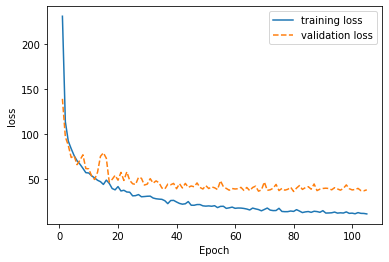

In [90]:
def create_plot(ax, hist_output, scale=1, prefix=None, same_colour=False):
    loss = hist_output.history['loss']
    val_loss = hist_output.history['val_loss']
    loss = np.asarray(loss)
#    loss = loss/loss.max()
    val_loss = np.asarray(val_loss)
#    val_loss = val_loss/val_loss.max()

    epoch = np.arange(1, len(loss) +1)
    
    label = 'training loss'
    if prefix is not None: label = '{}: {}'.format(prefix, label)
    line, = ax.plot(epoch, loss * scale, '-', label=label)
    
    label = 'validation loss'
    if prefix is not None: label = '{}: {}'.format(prefix, label)
        
    kws = {}
    if same_colour:
        colour = line.get_color()
        kws.setdefault('color', colour)
    ax.plot(epoch, val_loss * scale, '--', label=label, **kws)
    ax.set_xlabel('Epoch')
    ax.set_ylabel('loss')
    ax.legend(loc=0)

fig, ax = plt.subplots(1, 1)
create_plot(ax, hist['simple'], scale=1000)

In [37]:
from scipy.stats import gaussian_kde

#Quite decent result with 2002, 447, 100, 22 -> 4

y_test_evaluation_emittance = np.asarray(y_test['Log_emittance'][:20000].values.tolist())
calculated_evaluation_emittance = model.predict(x_test)[:20000,0]
xy0 = np.vstack([y_test_evaluation_emittance, calculated_evaluation_emittance])
z0 = gaussian_kde(xy0)(xy0)

y_test_evaluation_bunch_length = np.asarray(y_test['Log_bunch_length'][:20000].values.tolist())
calculated_evaluation_bunch_length = model.predict(x_test)[:20000,1]
xy3 = np.vstack([y_test_evaluation_bunch_length, calculated_evaluation_bunch_length])
z3 = gaussian_kde(xy3)(xy3)

y_test_evaluation_energy = np.asarray(y_test['Log_energy'][:20000].values.tolist())
calculated_evaluation_energy = model.predict(x_test)[:20000,2]
xy1 = np.vstack([y_test_evaluation_energy, calculated_evaluation_energy])
z1 = gaussian_kde(xy1)(xy1)

y_test_evaluation_deviation = np.asarray(y_test['Log_deviation'][:20000].values.tolist())
calculated_evaluation_deviation = model.predict(x_test)[:20000,3]
xy2 = np.vstack([y_test_evaluation_deviation, calculated_evaluation_deviation])
z2 = gaussian_kde(xy2)(xy2)

#plt.scatter(y_test['Log_bunch_length'],model.predict(x_test)[:,3:])
fig,axs = plt.subplots(2,2,figsize=(12,8))

axs[0,0].set_title('Log emittance')
axs[0,0].scatter(y_test_evaluation_emittance,calculated_evaluation_emittance,c=z0,s=1)
axs[0,0].plot(y_test['Log_emittance'],y_test['Log_emittance'],'r')

axs[0,1].set_title('Log bunch length')
axs[0,1].scatter(y_test_evaluation_bunch_length,calculated_evaluation_bunch_length,c=z3,s=1)
axs[0,1].plot(y_test['Log_bunch_length'],y_test['Log_bunch_length'],'r')

axs[1,0].set_title('Log energy')
axs[1,0].scatter(y_test_evaluation_energy,calculated_evaluation_energy,c=z1,s=1)
axs[1,0].plot(y_test['Log_energy'],y_test['Log_energy'],'r')

axs[1,1].set_title('Log energy deviation')
axs[1,1].scatter(y_test_evaluation_deviation,calculated_evaluation_deviation,c=z2,s=1)
axs[1,1].plot(y_test['Log_deviation'],y_test['Log_deviation'],'r')

fig.savefig('4out_model.png')
plt.show()


IndexError: only integers, slices (`:`), ellipsis (`...`), numpy.newaxis (`None`) and integer or boolean arrays are valid indices

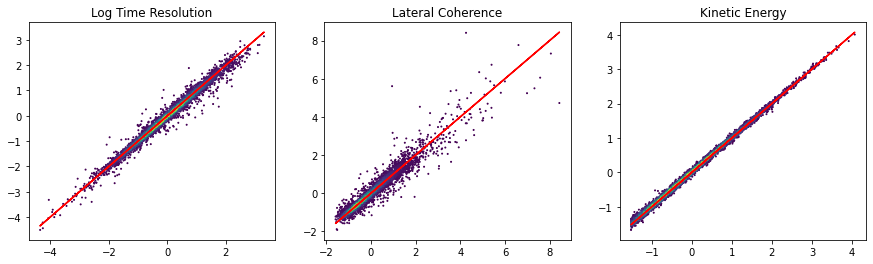

In [91]:
from scipy.stats import gaussian_kde


#Extremely good result with 2002, 447, 100, 22 -> 4
y_test_evaluation_emittance = np.asarray(y_test[:,0][:20000])
calculated_evaluation_emittance = model.predict(x_test)[:20000,0]
xy0 = np.vstack([y_test_evaluation_emittance, calculated_evaluation_emittance])
z0 = gaussian_kde(xy0)(xy0)

y_test_evaluation_bunch_length = np.asarray(y_test[:,1][:20000])
calculated_evaluation_bunch_length = model.predict(x_test)[:20000,1]
xy3 = np.vstack([y_test_evaluation_bunch_length, calculated_evaluation_bunch_length])
z3 = gaussian_kde(xy3)(xy3)

y_test_evaluation_deviation = np.asarray(y_test[:,2][:20000])
calculated_evaluation_deviation = model.predict(x_test)[:20000,2]
xy2 = np.vstack([y_test_evaluation_deviation, calculated_evaluation_deviation])
z2 = gaussian_kde(xy2)(xy2)

#plt.scatter(y_test['Log_bunch_length'],model.predict(x_test)[:,3:])
fig,axs = plt.subplots(1,3,figsize=(15,4))

axs[0].set_title('Log Time Resolution')
axs[0].scatter(y_test_evaluation_emittance,calculated_evaluation_emittance,c=z0,s=1)
axs[0].plot(y_test[:,0],y_test[:,0],'r')

axs[1].set_title('Lateral Coherence')
axs[1].scatter(y_test_evaluation_bunch_length,calculated_evaluation_bunch_length,c=z3,s=1)
axs[1].plot(y_test[:,1],y_test[:,1],'r')

axs[2].set_title('Kinetic Energy')
axs[2].scatter(y_test_evaluation_deviation,calculated_evaluation_deviation,c=z2,s=1)
axs[2].plot(y_test[:,2],y_test[:,2],'r')

fig.savefig('3out_model.png')
plt.show()

In [ ]:
#Amazing result with 2002, 447, 100, 22 -> 2
y_test_evaluation_bunch_length = np.asarray(y_test['Log_bunch_length'][:20000].values.tolist())
calculated_evaluation_bunch_length = model.predict(x_test)[:20000,0]
xy3 = np.vstack([y_test_evaluation_bunch_length, calculated_evaluation_bunch_length])
z3 = gaussian_kde(xy3)(xy3)

y_test_evaluation_deviation = np.asarray(y_test['Log_deviation'][:20000].values.tolist())
calculated_evaluation_deviation = model.predict(x_test)[:20000,1]
xy2 = np.vstack([y_test_evaluation_deviation, calculated_evaluation_deviation])
z2 = gaussian_kde(xy2)(xy2)

#plt.scatter(y_test['Log_bunch_length'],model.predict(x_test)[:,3:])
fig,axs = plt.subplots(1,2,figsize=(12,4))

axs[0].set_title('Log deviation')
axs[0].scatter(y_test_evaluation_deviation,calculated_evaluation_deviation,c=z2,s=1)
axs[0].plot(y_test['Log_deviation'],y_test['Log_deviation'],'r')

axs[1].set_title('Log bunch length')
axs[1].scatter(y_test_evaluation_bunch_length,calculated_evaluation_bunch_length,c=z3,s=1)
axs[1].plot(y_test['Log_bunch_length'],y_test['Log_bunch_length'],'r')

fig.savefig('2out_model.png')
plt.show()

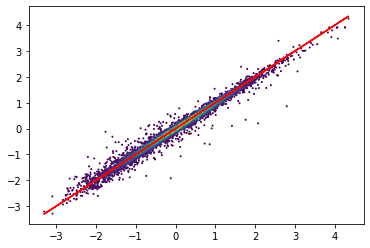

In [30]:
from scipy.stats import gaussian_kde
#For 1 output model
#Result with 550, 450, 210 -> 1
y_test_evaluation = np.asarray(y_test[:len(y_test)])[:,0]
calculated_evaluation = model.predict(x_test)[:len(y_test),0]

xy = np.vstack([y_test_evaluation, calculated_evaluation])
z = gaussian_kde(xy)(xy)

fig = plt.figure()
plt.scatter(y_test_evaluation, calculated_evaluation, c=z, s=1)
plt.plot(y_test,y_test,'r')
fig.savefig('1out_model.png')
